In [1]:
from pathlib import Path
from amc_parser.motion import MotionCapture
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

asf_path = Path.cwd() / 'mocap' / 'subjects' / '02' / '02.asf'

walk_amc_path = Path.cwd() / 'mocap' / 'subjects' / '02' / '02_02.amc'
run_amc_path = Path.cwd() / 'mocap' / 'subjects' / '02' / '02_03.amc'

walk_mocap = MotionCapture(asf_path, walk_amc_path)
run_mocap = MotionCapture(asf_path, run_amc_path)

walk_df = walk_mocap.as_dataframe()
run_df = run_mocap.as_dataframe()

walk_df

<frozen importlib._bootstrap>:488: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.


pygame 2.6.1 (SDL 2.30.7, Python 3.12.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


,frame,time,root_tx,root_ty,root_tz,root_rx,root_ry,root_rz,lfemur_rx,lfemur_ry,...,rhumerus_rx,rhumerus_ry,rhumerus_rz,rradius_rx,rwrist_ry,rhand_rx,rhand_rz,rfingers_rx,rthumb_rx,rthumb_rz
0,0,0.000000,0.539458,0.904274,-2.296899,-0.2216,-5.68439,-5.60634,-40.7617,0.052942,...,-11.6039,22.2986,-83.518,57.6577,-21.5344,-31.0564,21.5082,7.12502,-4.33755,-8.42735
1,1,0.008333,0.54029,0.90293,-2.286277,0.151414,-6.08425,-6.02095,-41.247,-0.42686,...,-10.8785,23.0644,-83.1691,58.0401,-21.2406,-30.9158,21.2593,7.12502,-4.20181,-8.67896
2,2,0.016667,0.54131,0.901615,-2.275225,0.377493,-6.48713,-6.44745,-41.624,-0.862031,...,-11.1857,23.2668,-83.7817,58.4631,-20.8433,-31.2355,21.9224,7.12502,-4.51052,-8.00959
3,3,0.025000,0.542679,0.901232,-2.263242,0.347139,-6.86022,-6.24185,-41.5043,-1.39041,...,-9.60544,23.3949,-83.0099,58.7395,-20.6932,-31.6539,22.363,7.12502,-4.91452,-7.55998
4,4,0.033333,0.543885,0.901073,-2.250897,0.170873,-7.42645,-6.05237,-41.1533,-1.74566,...,-9.50603,23.6119,-83.0041,58.9966,-20.5296,-31.8203,22.1144,7.12502,-5.07525,-7.80486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,293,2.441667,0.576501,0.988862,1.681728,-4.87118,2.88453,-0.339539,10.6788,-1.84347,...,-47.4839,-1.02564,-91.7798,25.4129,-14.3059,-29.9456,20.7157,7.12502,-3.26487,-9.239
294,294,2.450000,0.575739,0.990182,1.697708,-5.44888,4.75533,-0.647548,13.0862,-2.18,...,-47.6971,-2.37239,-91.0821,23.2377,-13.3727,-30.012,21.0938,7.12502,-3.32904,-8.85996
295,295,2.458333,0.575462,0.990092,1.711125,-5.27492,5.56281,-0.511779,14.6187,-2.17744,...,-48.469,-3.77449,-90.2919,22.0622,-13.1089,-30.1947,21.4816,7.12502,-3.50545,-8.46936
296,296,2.466667,0.574966,0.989166,1.724666,-5.01797,6.38596,-0.487699,16.0851,-2.39625,...,-49.6274,-4.74261,-89.7214,21.3898,-12.8594,-29.9723,21.0275,7.12502,-3.2907,-8.92689


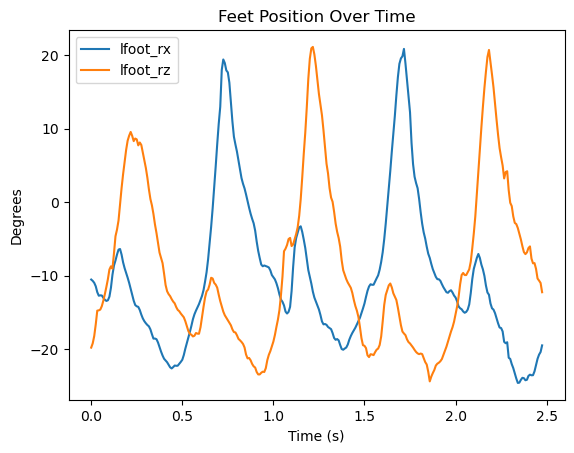

In [2]:
# Get the columns for the feet
lfoot_cols = walk_mocap.get_columns_for_joint('lfoot')
rfoot_cols = walk_mocap.get_columns_for_joint('rfoot')

# plot the left and right foot positions against time
foot_cols = lfoot_cols + rfoot_cols
walk_df.plot(x='time', y=['lfoot_rx', 'rfoot_rx'])
plt.xlabel('Time (s)')
plt.ylabel('Degrees')
plt.title('Feet Position Over Time')
plt.legend(foot_cols)

In [3]:
def get_velocity_df(df):

    # Calculate velocities using Euler differentiation
    vel_df = df.diff().iloc[1:].div(df['time'].diff().iloc[1:], axis=0)

    # Drop the frame number and time columns and remake them
    vel_df = vel_df.drop(columns=['frame', 'time'])
    vel_df['frame'] = vel_df.index + 1
    vel_df['time'] = df['time'].iloc[1:]

    return vel_df

walk_vel_df = get_velocity_df(walk_df)
run_vel_df = get_velocity_df(run_df)

walk_vel_df

,root_tx,root_ty,root_tz,root_rx,root_ry,root_rz,lfemur_rx,lfemur_ry,lfemur_rz,ltibia_rx,...,rhumerus_rz,rradius_rx,rwrist_ry,rhand_rx,rhand_rz,rfingers_rx,rthumb_rx,rthumb_rz,frame,time
1,0.099907,-0.161205,1.274741,44.76168,-47.9832,-49.7532,-58.236,-57.576228,126.192,-244.86,...,41.868,45.888,35.256,16.872,-29.868,0.0,16.2888,-30.1932,2,0.008333
2,0.122326,-0.157819,1.326219,27.12948,-48.3456,-51.18,-45.24,-52.22052,119.592,-187.188,...,-73.512,50.76,47.676,-38.364,79.572,0.0,-37.0452,80.3244,3,0.016667
3,0.164389,-0.046059,1.437979,-3.64248,-44.7708,24.672,14.364,-63.40548,30.876,-171.516,...,92.616,33.168,18.012,-50.208,52.872,0.0,-48.48,53.9532,4,0.025000
4,0.144611,-0.018965,1.481328,-21.15192,-67.9476,22.7376,42.12,-42.63,41.376,-118.068,...,0.696,30.852,19.632,-19.968,-29.832,0.0,-19.2876,-29.3856,5,0.033333
5,0.128558,-0.136821,1.496229,-19.088376,-62.694,-10.2636,23.52,-34.278,70.728,-64.728,...,53.04,16.488,-2.652,4.38,-0.624,0.0,4.2348,-0.7176,6,0.041667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,-0.061637,-0.060283,1.740069,-3.3156,125.6556,-1.67112,201.816,-1.9212,33.36,-190.32,...,72.072,-188.76,114.804,6.264,22.272,0.0,6.0552,22.1784,294,2.441667
294,-0.09144,0.158496,1.917531,-69.324,224.496,-36.96108,288.888,-40.3836,96.204,-196.224,...,83.724,-261.024,111.984,-7.968,45.372,0.0,-7.7004,45.4848,295,2.450000
295,-0.033189,-0.010837,1.610021,20.8752,96.8976,16.29228,183.9,0.3072,13.56,-213.252,...,94.824,-141.06,31.656,-21.924,46.536,0.0,-21.1692,46.872,296,2.458333
296,-0.059605,-0.111083,1.624923,30.834,98.778,2.8896,175.968,-26.2572,26.4,-210.996,...,68.46,-80.688,29.94,26.688,-54.492,0.0,25.77,-54.9036,297,2.466667


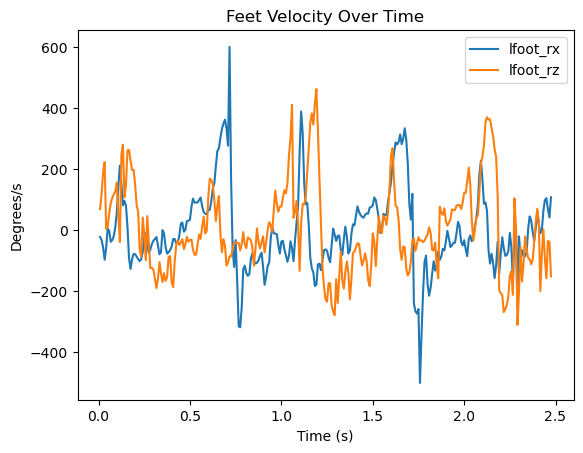

In [4]:
# Get the columns for the feet
lfoot_cols = walk_mocap.get_columns_for_joint('lfoot')
rfoot_cols = walk_mocap.get_columns_for_joint('rfoot')

# plot the left and right velocities against time
foot_cols = lfoot_cols + rfoot_cols
walk_vel_df.plot(x='time', y=['lfoot_rx', 'rfoot_rx'])
plt.xlabel('Time (s)')
plt.ylabel('Degrees/s')
plt.title('Feet Velocity Over Time')
plt.legend(foot_cols)

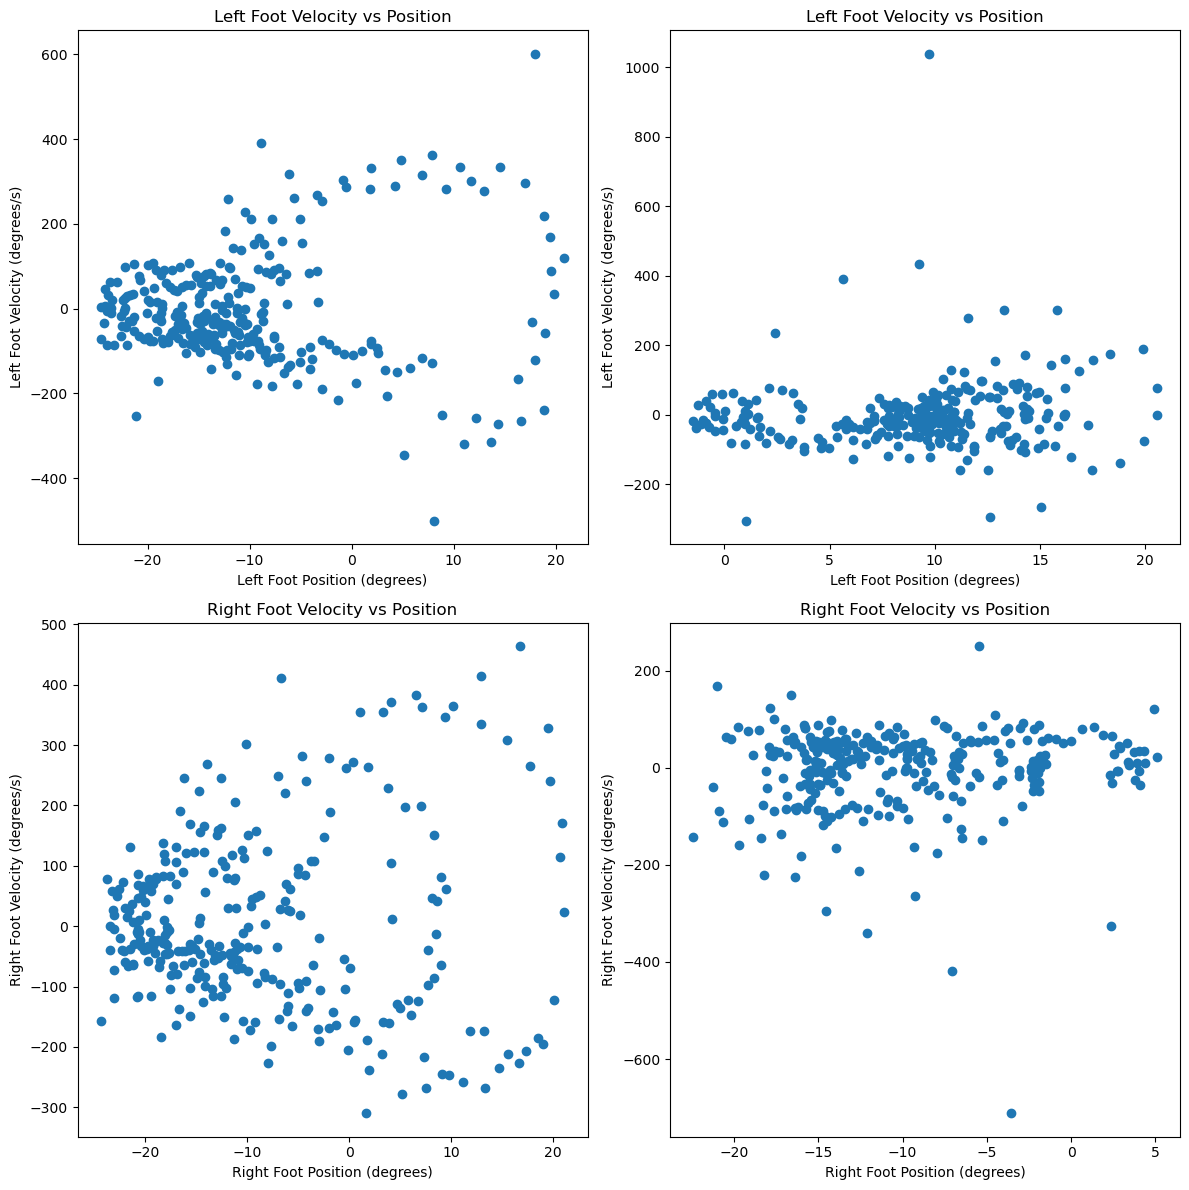

In [5]:
# Plot the velocity of the feet as a function of the position of the feet
# Make multiple subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0, 0].scatter(walk_df['lfoot_rx'][1:], walk_vel_df['lfoot_rx'], label='Left Foot')
axs[0, 0].set_xlabel('Left Foot Position (degrees)')
axs[0, 0].set_ylabel('Left Foot Velocity (degrees/s)')
axs[0, 0].set_title('Left Foot Velocity vs Position')

axs[0, 1].scatter(walk_df['lfoot_rz'][1:], walk_vel_df['lfoot_rz'], label='Left Foot')
axs[0, 1].set_xlabel('Left Foot Position (degrees)')
axs[0, 1].set_ylabel('Left Foot Velocity (degrees/s)')
axs[0, 1].set_title('Left Foot Velocity vs Position')

axs[1, 0].scatter(walk_df['rfoot_rx'][1:], walk_vel_df['rfoot_rx'], label='Right Foot')
axs[1, 0].set_xlabel('Right Foot Position (degrees)')
axs[1, 0].set_ylabel('Right Foot Velocity (degrees/s)')
axs[1, 0].set_title('Right Foot Velocity vs Position')

axs[1, 1].scatter(walk_df['rfoot_rz'][1:], walk_vel_df['rfoot_rz'], label='Right Foot')
axs[1, 1].set_xlabel('Right Foot Position (degrees)')
axs[1, 1].set_ylabel('Right Foot Velocity (degrees/s)')
axs[1, 1].set_title('Right Foot Velocity vs Position')

plt.tight_layout()


Train a Gaussian Process Dynamic Model

In [6]:

leg_feet_cols = walk_mocap.get_columns_for_joints(['lfoot', 'rfoot', 'ltibia', 'rtibia', 'lfemur', 'rfemur'])
walk_df_reduced = walk_df[leg_feet_cols]
walk_vel_df_reduced = walk_vel_df[leg_feet_cols]

walk_df_reduced

,lfoot_rx,lfoot_rz,rfoot_rx,rfoot_rz,ltibia_rx,rtibia_rx,lfemur_rx,lfemur_ry,lfemur_rz,rfemur_rx,rfemur_ry,rfemur_rz
0,-10.5232,9.51985,-19.787,-5.57351,39.1467,9.70802,-40.7617,0.052942,-13.9199,14.4369,1.96534,30.002
1,-10.705,10.3769,-19.2068,-5.66544,37.1062,8.31771,-41.247,-0.42686,-12.8683,15.43,2.40887,30.3571
2,-10.9714,11.3992,-18.2094,-5.97861,35.5463,6.24497,-41.624,-0.862031,-11.8717,16.9599,2.81492,30.7511
3,-11.4402,12.222,-16.6185,-6.55398,34.117,3.22029,-41.5043,-1.39041,-11.6144,19.2329,3.1651,30.4716
4,-12.244,12.6407,-14.7563,-7.0421,33.1331,-0.0,-41.1533,-1.74566,-11.2696,21.7839,3.6594,30.2676
...,...,...,...,...,...,...,...,...,...,...,...,...
293,-22.1909,7.17178,-9.07334,-13.7709,25.0464,37.4817,10.6788,-1.84347,-26.8203,-28.4309,5.66015,19.7312
294,-21.3095,6.10989,-10.3849,-14.7471,23.4112,34.6181,13.0862,-2.18,-26.0186,-27.4751,5.48644,19.5019
295,-20.74,5.77342,-10.6719,-15.0201,21.6341,32.0065,14.6187,-2.17744,-25.9056,-27.6699,5.69604,18.8868
296,-20.388,4.98975,-10.99,-15.6193,19.8758,29.2762,16.0851,-2.39625,-25.6856,-27.6572,5.60507,18.5325


In [7]:
import torch

# Generate training data
X = torch.from_numpy(walk_df_reduced.to_numpy().astype(np.float32)[:-1])
Y = torch.from_numpy(walk_vel_df_reduced.to_numpy().astype(np.float32))

print(X.shape, Y.shape)

torch.Size([297, 12]) torch.Size([297, 12])


In [16]:
from posegp import PoseGP

# Create the model
D = len(leg_feet_cols) # Number of dimensions 
walk_gp = PoseGP(num_dofs=D, num_latents=1, learning_rate=0.5) 
walk_gp.fit(X, Y, iterations=1000)

Iteration 0/1000 - Loss: 4369.5708
Iteration 10/1000 - Loss: 497.7330
Iteration 20/1000 - Loss: 234.3797
Iteration 30/1000 - Loss: 186.3171
Iteration 40/1000 - Loss: 168.8134
Iteration 50/1000 - Loss: 159.2867
Iteration 60/1000 - Loss: 152.7654
Iteration 70/1000 - Loss: 147.5243
Iteration 80/1000 - Loss: 142.9641
Iteration 90/1000 - Loss: 138.8261
Iteration 100/1000 - Loss: 135.0026


KeyboardInterrupt: 

In [13]:
# Compute likelihood of the training data
likelihood = walk_gp.log_likelihood(X, Y)
likelihood

-89275.5546875

In [14]:
print(walk_gp.likelihood.noise)

tensor([19.2750], grad_fn=<AddBackward0>)
